<a href="https://colab.research.google.com/github/educhile1/challenge_datascience1-ONE/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo: ('Artículos para el hogar',)


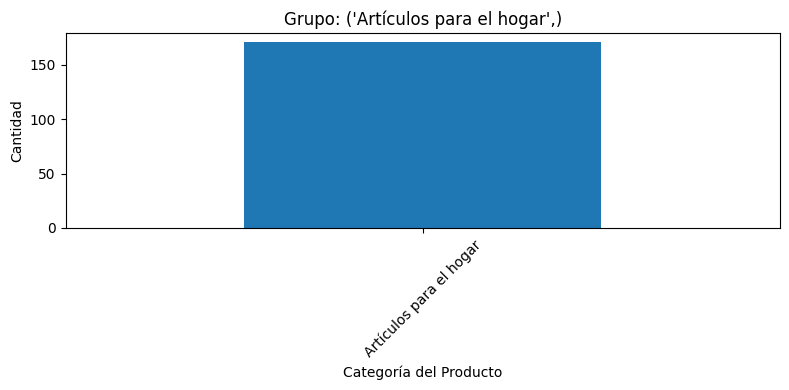

Grupo: ('Deportes y diversión',)


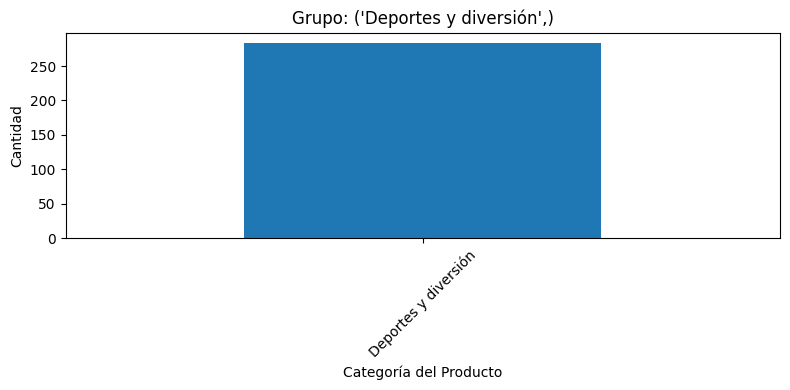

Grupo: ('Electrodomésticos',)


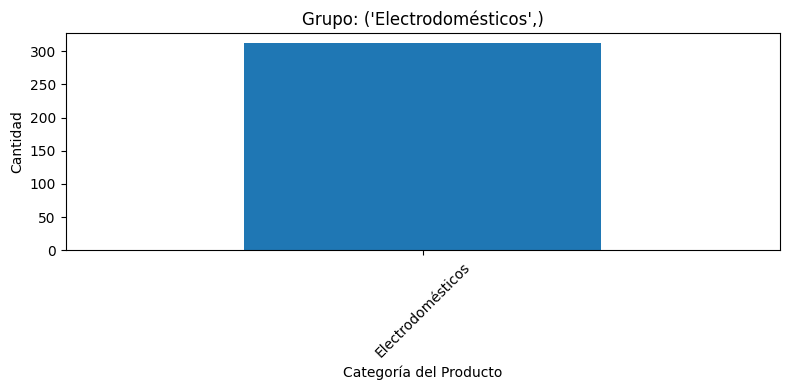

Grupo: ('Electrónicos',)


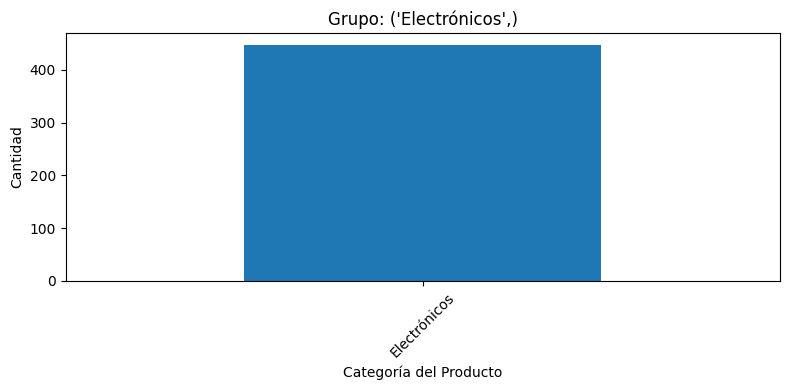

Grupo: ('Instrumentos musicales',)


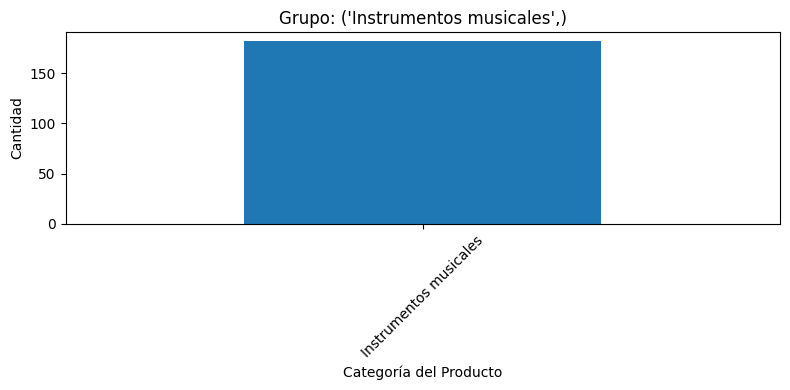

Grupo: ('Juguetes',)


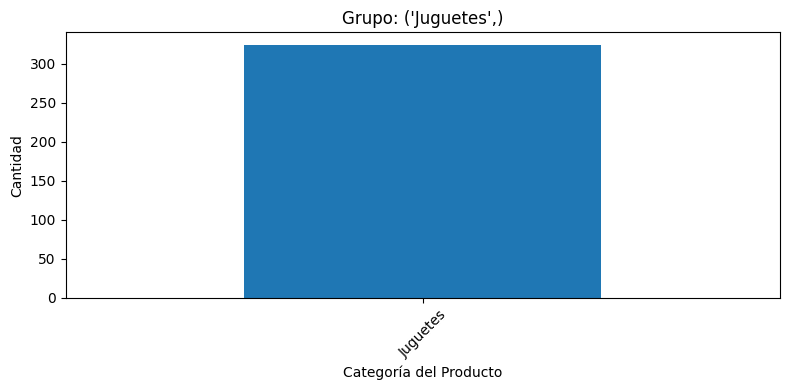

Grupo: ('Libros',)


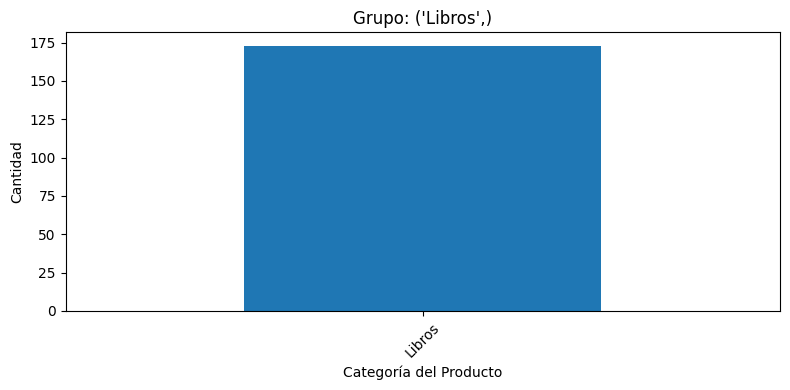

Grupo: ('Muebles',)


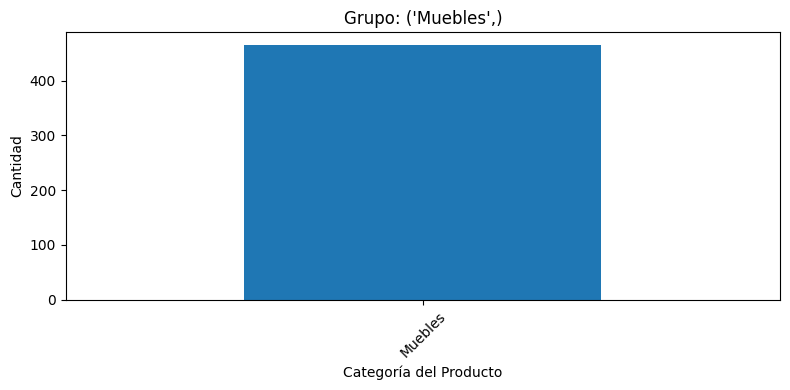

2359
[{'Grupo': ('Artículos para el hogar',), 'Count': np.int64(171)}, {'Grupo': ('Deportes y diversión',), 'Count': np.int64(284)}, {'Grupo': ('Electrodomésticos',), 'Count': np.int64(312)}, {'Grupo': ('Electrónicos',), 'Count': np.int64(448)}, {'Grupo': ('Instrumentos musicales',), 'Count': np.int64(182)}, {'Grupo': ('Juguetes',), 'Count': np.int64(324)}, {'Grupo': ('Libros',), 'Count': np.int64(173)}, {'Grupo': ('Muebles',), 'Count': np.int64(465)}]


In [52]:
import pandas as pd
import matplotlib.pyplot as plt




url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


dataTienda= pd.DataFrame(tienda)

dataTienda.head(20)
#dataTienda.groupby(['Producto']).sum().head(20)


#dataTienda.info()



dataTiendaClear= dataTienda.drop(columns=['Cantidad de cuotas', 'lat', 'lon', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra', 'Calificación']).sort_values(by='Producto', ascending=True)


dataTienda.head(50)

#dataTienda.sum

totVentaTienda= dataTienda['Precio'].sum()

calPromTienda=  dataTienda['Calificación'].mean()

#dataTienda.groupby("Producto").sum().hist()

#print(totVentaTienda)
#print(calPromTienda)
#dataTiendaClear.info()
%matplotlib inline

catOrder=dataTiendaClear.groupby(['Categoría del Producto']) #.hist()



total=0
group_data = []
for nombre, grupo_df in catOrder:
          print(f"Grupo: {nombre}")
        # grupo_df['Categoría del Producto'].value_counts()

          counts = grupo_df['Categoría del Producto'].value_counts()
          #total =+ counts.sum()

          # Fixed: Corrected indentation for lines inside the loop
          plt.figure(figsize=(8, 4))
          counts.plot(kind='bar')
          plt.title(f'Grupo: {nombre}')
          plt.xlabel('Categoría del Producto')
          plt.ylabel('Cantidad')
          plt.xticks(rotation=45)
          plt.tight_layout()
          plt.show()
          total += counts.sum()
          group_data.append(
            {"Grupo": nombre, "Count": counts.sum()}
          )  # Append group data to the list


print(total)
print(group_data)



### Importación de datos



Grupo: ('Artículos para el hogar',)


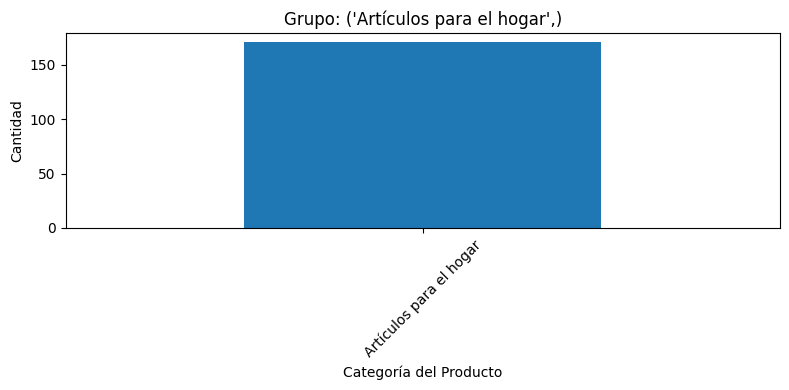

Grupo: ('Deportes y diversión',)


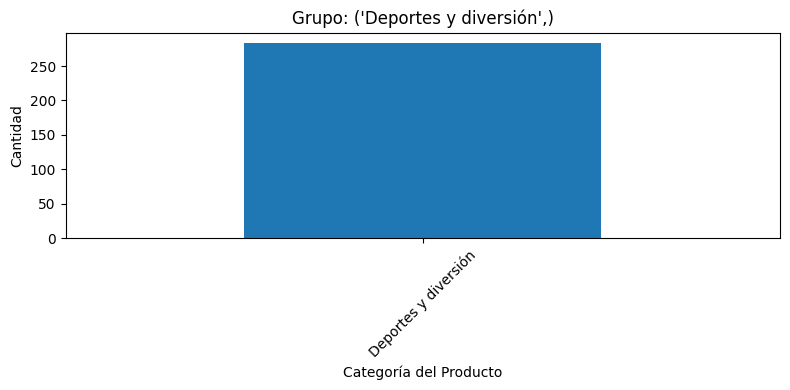

Grupo: ('Electrodomésticos',)


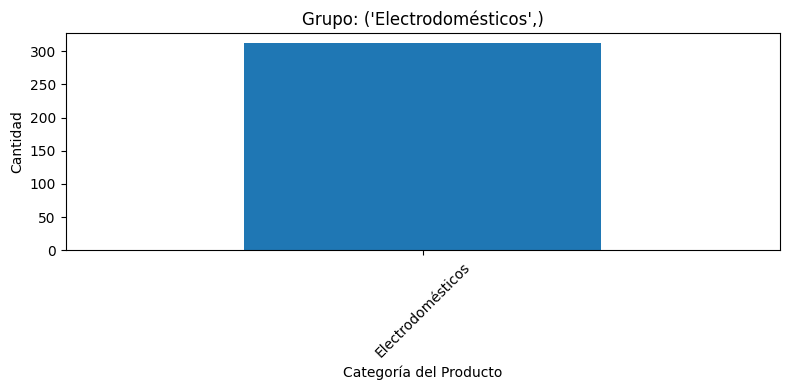

Grupo: ('Electrónicos',)


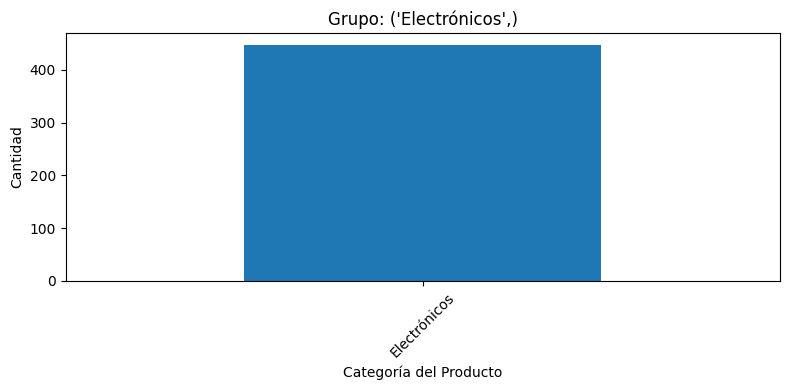

Grupo: ('Instrumentos musicales',)


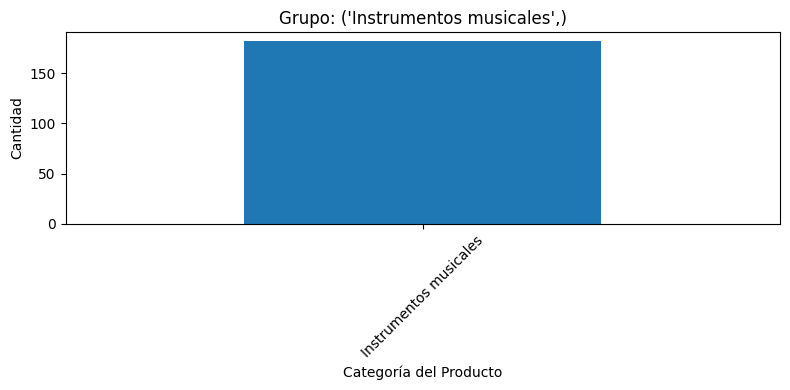

Grupo: ('Juguetes',)


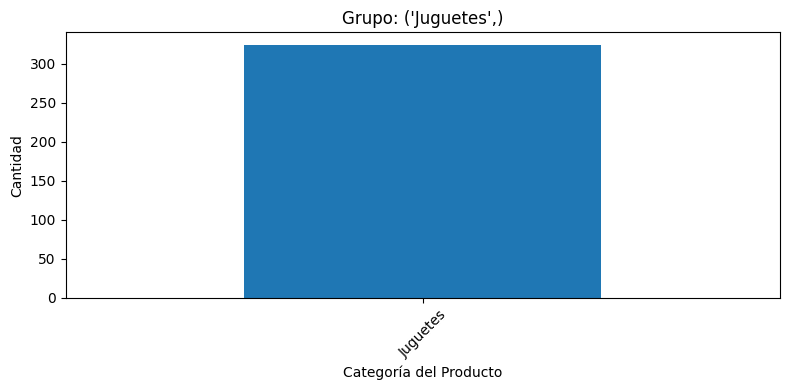

Grupo: ('Libros',)


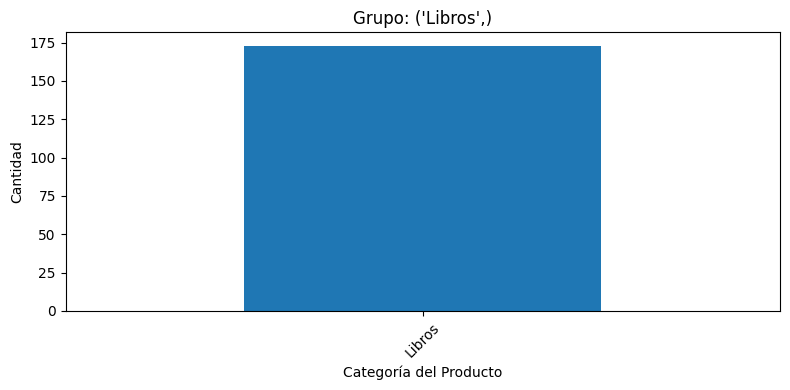

Grupo: ('Muebles',)


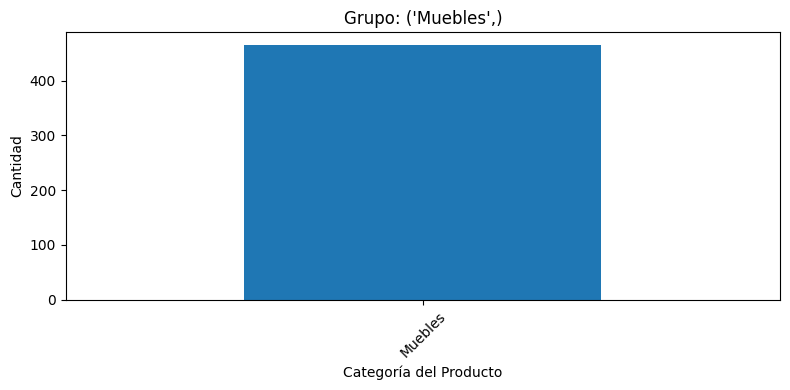

4718
Grupo: ('Artículos para el hogar',), Count: 171
Grupo: ('Deportes y diversión',), Count: 284
Grupo: ('Electrodomésticos',), Count: 312
Grupo: ('Electrónicos',), Count: 448
Grupo: ('Instrumentos musicales',), Count: 182
Grupo: ('Juguetes',), Count: 324
Grupo: ('Libros',), Count: 173
Grupo: ('Muebles',), Count: 465


In [54]:
import pandas as pd
import matplotlib.pyplot as plt




url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


dataTienda= pd.DataFrame(tienda)

dataTienda.head(20)
#dataTienda.groupby(['Producto']).sum().head(20)


#dataTienda.info()



dataTiendaClear= dataTienda.drop(columns=['Cantidad de cuotas', 'lat', 'lon', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra', 'Calificación']).sort_values(by='Producto', ascending=True)


dataTienda.head(50)

#dataTienda.sum

totVentaTienda= dataTienda['Precio'].sum()

calPromTienda=  dataTienda['Calificación'].mean()

#dataTienda.groupby("Producto").sum().hist()

#print(totVentaTienda)
#print(calPromTienda)
#dataTiendaClear.info()
%matplotlib inline

catOrder=dataTiendaClear.groupby(['Categoría del Producto']) #.hist()



total=0
group_data = []  # Initialize an empty list to store group data
for nombre, grupo_df in catOrder:
          print(f"Grupo: {nombre}")
        # grupo_df['Categoría del Producto'].value_counts()

          counts = grupo_df['Categoría del Producto'].value_counts()
          #total =+ counts.sum()

          # Fixed: Corrected indentation for lines inside the loop
          plt.figure(figsize=(8, 4))
          counts.plot(kind='bar')
          plt.title(f'Grupo: {nombre}')
          plt.xlabel('Categoría del Producto')
          plt.ylabel('Cantidad')
          plt.xticks(rotation=45)
          plt.tight_layout()
          plt.show()
          total += counts.sum()
          total += counts.sum()  # Added line to sum counts to total
          group_data.append(
            {"Grupo": nombre, "Count": counts.sum()}
          )  # Append group data to the list


print(total)

# Print the stored group data
for group in group_data:
    print(f"Grupo: {group['Grupo']}, Count: {group['Count']}")



#1. Análisis de facturación



# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda